In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("../assets/csv-files/maths.csv")
dataset.head(3)

,Number1,Number2,Number3,Total Sum
0,971.844377,1760.131196,1689.181218,4421.15679
1,NaN,NaN,NaN,0.00000
2,NaN,NaN,NaN,0.00000


In [4]:
# Check for null values
dataset.isnull().sum()

Number1      454
Number2      915
Number3      931
Total Sum    499
dtype: int64

In [5]:
# Fill the null values
for column in dataset.columns:
    dataset[column].fillna(dataset[column].mean(), inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_25180\4137152223.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].mean(), inplace=True)


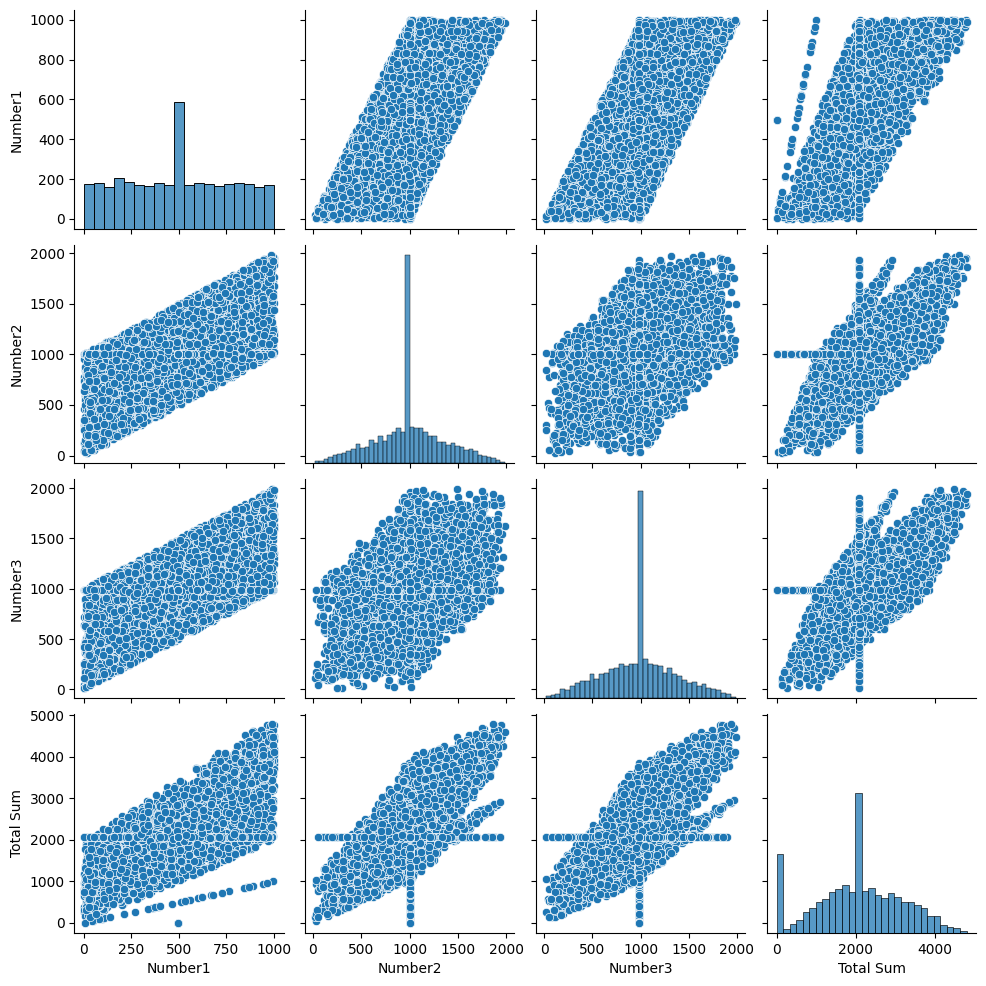

In [6]:
# Visualize data
sns.pairplot(data=dataset)
plt.show()

In [7]:
# Seperate dependent and independent variables
x = dataset.iloc[:, :-1]
y = dataset["Total Sum"]

In [8]:
# Train test split
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Build a model
from sklearn.tree import DecisionTreeRegressor

In [11]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [12]:
dtr.score(x_test, y_test)

0.7956090445142006

In [13]:
# Check if the model is overfitted
dtr.score(x_train, y_train), dtr.score(x_test, y_test)

(0.9721437141434656, 0.7956090445142006)

In [14]:
# We find huge difference between score of train and test data so the model is overfitted
# Find the best value of max_depth
for i in range(1, 20):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(x_train, y_train)
    print(dtr.score(x_train, y_train), dtr.score(x_test, y_test), i)

0.4557881959285933 0.4535301826044774 1
0.6572941379489543 0.6645000738510829 2
0.7554039094612435 0.7472009336507468 3
0.8104185389613009 0.8004768319246018 4
0.8401756457753641 0.8259180267927214 5
0.8664246563526974 0.8464792385825687 6
0.8874588569159623 0.8472315255092243 7
0.9024836688642992 0.8478392258209109 8
0.9168286069728799 0.8441273142470808 9
0.9299444227681867 0.8306051178726259 10
0.9391948078347675 0.8197738860804827 11
0.9459667708892011 0.8183447492120624 12
0.9528997809657722 0.8142594050464421 13
0.9598240055631538 0.8038584100634261 14
0.9645521329369152 0.797633386923173 15
0.966796396727914 0.7981402453203066 16
0.9696697344879861 0.8015678332575441 17
0.9709893912471858 0.7928188781621219 18
0.9716515366427367 0.7940902693734804 19


In [15]:
# Select the best value of max_depth and train the model
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=4)

In [16]:
# For visualization of decision tree
from sklearn.tree import plot_tree

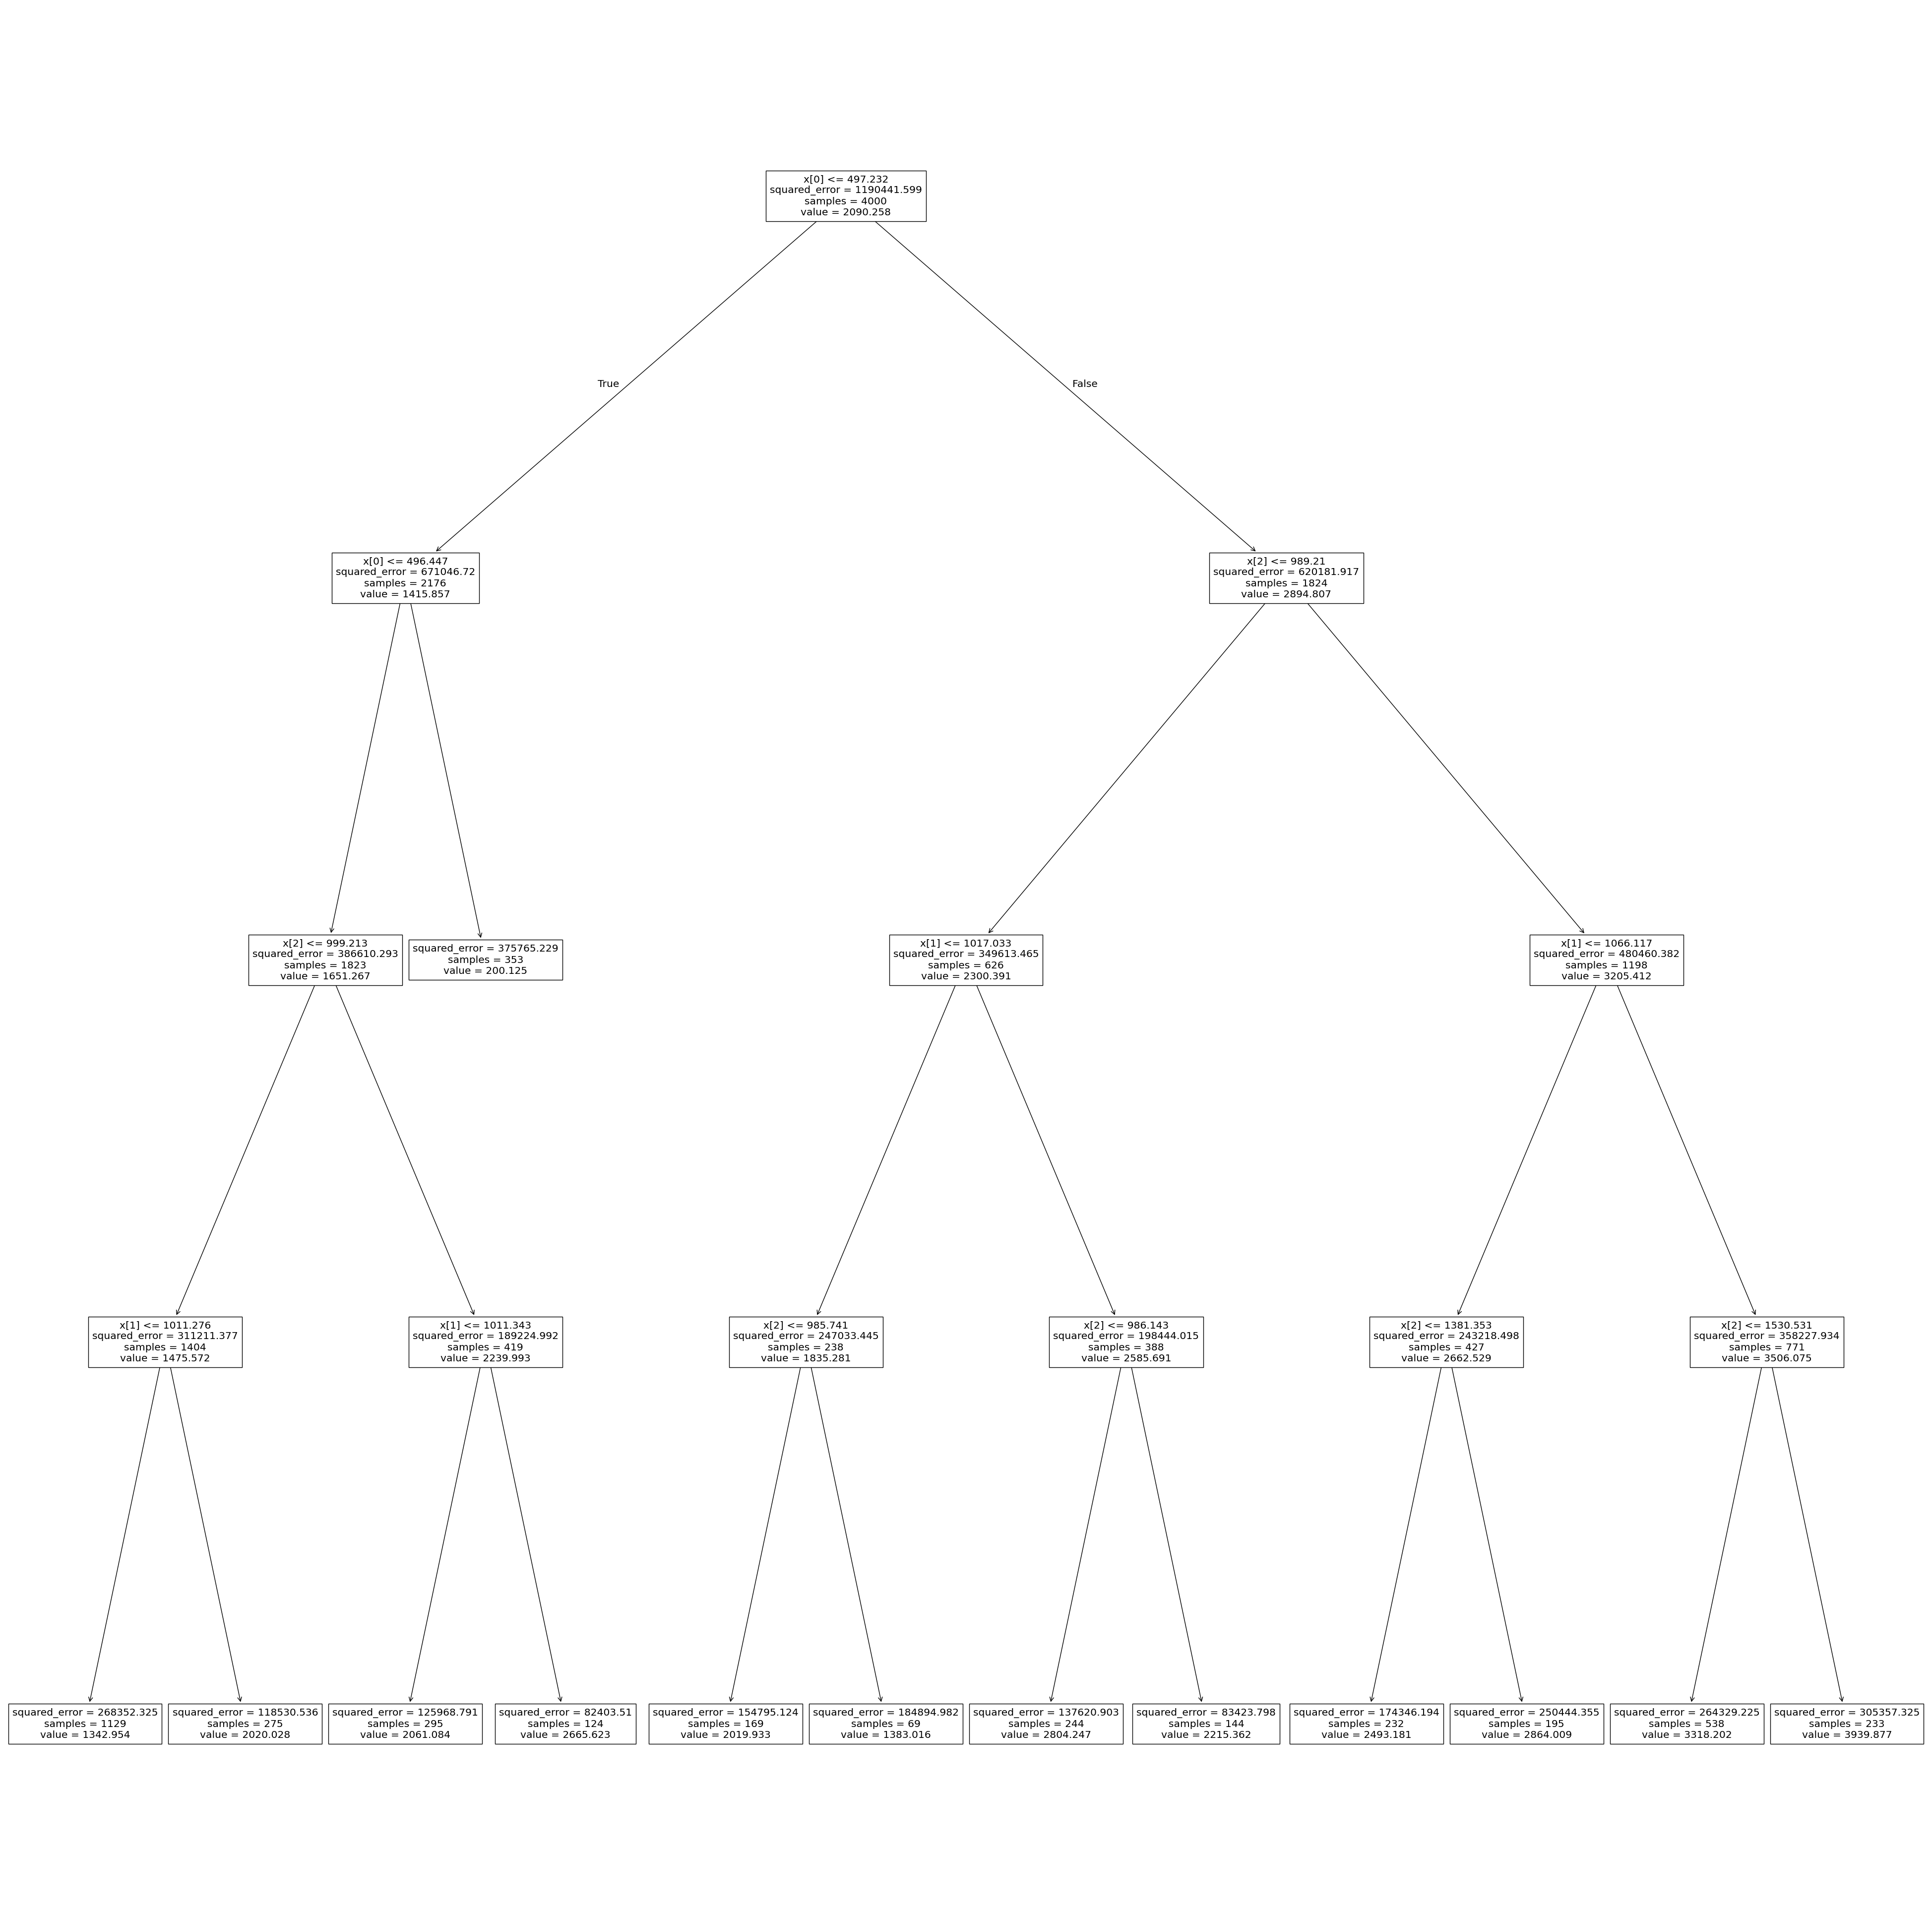

In [17]:
plt.figure(figsize=(50, 50))
plot_tree(dtr)
plt.show()